Bộ dữ liệu áp dụng: Iris. Bộ này được cung cấp và hỗ trợ sẵn bởi thư viện sklearn.
Dữ liệu huấn luyện cho bài toán phân lớp sẽ gồm 2 phần:
●	X: các thuộc tính của dữ liệu. Có tổng cộng 4 thuộc tính gồm Sepal Length, Sepal Width, Petal Length, Petal Width.
●	y: thuộc tính nhãn. Có 3 nhãn gồm Setosa, Versicolour, and Virginica
Tổng cộng có 150 điểm dữ liệu. 


Bài 1: Các bạn hiện thực lại mô hình Logistic Regression theo các hướng dẫn ở mục 2. Huấn luyện mô hình với siêu tham số alpha = 0.1 và iter = 100.

Dùng thuộc tính Petal Width để phân loại xem loài hoa đang xét có phải là Virginica hay không => phân lớp nhị phân với 2 nhãn: Virginica (1) và không phải Virginica (0).

In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()

X = iris['data'][:, 3:]

y = (iris['target']  == 2).astype(np.int32)

In [2]:
# Sử dụng np.bincount() để đếm số lượng nhãn
count_labels = np.bincount(y)

print("Số lượng nhãn 0:", count_labels[0])
print("Số lượng nhãn 1:", count_labels[1])

Số lượng nhãn 0: 100
Số lượng nhãn 1: 50


In [3]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)


In [4]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis = 1)

In [5]:
import numpy as np

def sigmoid(w, X):
    return 1 / (1 + np.exp(-np.dot(X, w)))

def compute_loss(w, X, y):
    return -np.mean(y * np.log(sigmoid(w, X)) + (1 - y) * np.log(1 - sigmoid(w, X)))

def compute_gradient(w, X, y):
    return (np.dot(X.T, (sigmoid(w, X) - y)))/len(y)

def initialize_parameters(X):
    return np.zeros(X.shape[1])

def fit(X, y, learning_rate=0.1, iter=100):
    w = initialize_parameters(X)
    losses = []
    for i in range(iter):
        loss = compute_loss(w, X, y)
        gradient = compute_gradient(w, X, y)
        w -= learning_rate * gradient
        losses.append(loss)
    return w, losses

def predict(w, X_new):
    y_prob = sigmoid(w, X_new)
    y_pred = np.where(y_prob >= 0.5, 1, 0)
    return y_pred


In [6]:
w_best, loss = fit(X, y, learning_rate=0.1, iter=100)
print("Trọng số tốt nhất: ",w_best)

Trọng số tốt nhất:  [-1.21750324  0.75168712]


Bài 2: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho 100 dòng dữ liệu đầu tiên từ tập dữ liệu gốc. So sánh kết quả dự đoán với nhãn thực sự của dữ liệu.


In [7]:
from sklearn.metrics import accuracy_score
X_test = X[0:100]
y_test = y[0:100]
y_pred = predict(w_best, X_test)

print(y_test)
print(y_pred)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy_score:  0.98


Bài 3: Trong Bước 5, với mỗi lần lặp để cập nhật trọng số, hãy tính giá trị hàm mất mát của mỗi lần lặp và đưa vào list loss. Vẽ biểu đồ giá trị loss sau mỗi lần lặp. 


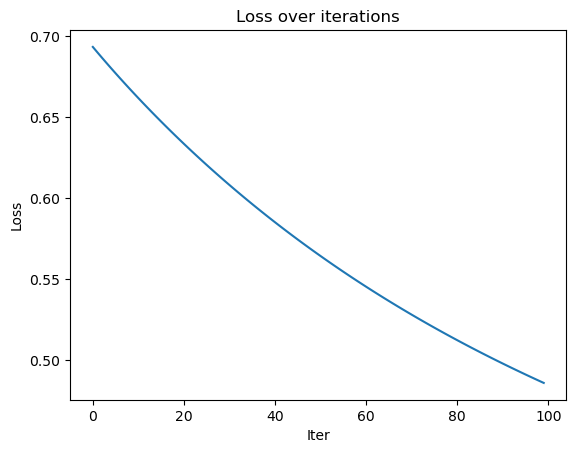

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=range(len(loss)), y=loss)
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

Bài 4: Dùng tham số θ vừa huấn luyện được từ mô hình dự đoán cho dữ liệu X_new.


In [9]:
y_pred_4 = predict(w_best, X_new)
print("Predict of X_new:\n", y_pred_4)


Predict of X_new:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

Bài 5: Các bạn hãy dùng thư viện Logistic Regression trong sklearn để dự đoán, và so sánh kết quả giữa dùng thư viện và làm bằng tay đối với Bài 2 và Bài 4.


In [10]:
# BÀI 2

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
clf_y_pred = clf.predict(X[0:100])
print("Accuracy_score: ", accuracy_score(y[0:100], clf_y_pred))

Accuracy_score:  0.98


In [11]:
# BÀI 4 
clf_y_pred_4 = clf.predict(X_new)
print("Accuracy_score between y_pred_4 và clf_y_pred_4: ", accuracy_score(y_pred_4, clf_y_pred_4))

Accuracy_score between y_pred_4 và clf_y_pred_4:  0.987


Bài 6: Hãy sử dụng các thuộc tính khác như Petal Length, Sepal Length và Sepal Width để huấn luyện cho mô hình, và cho biết kết quả. 


Số lượng nhãn 0: 100
Số lượng nhãn 1: 50
Trọng số tốt nhất:  [-0.30747667 -0.62253073 -0.73600267  1.30625466]
Accuracy_score:  0.95


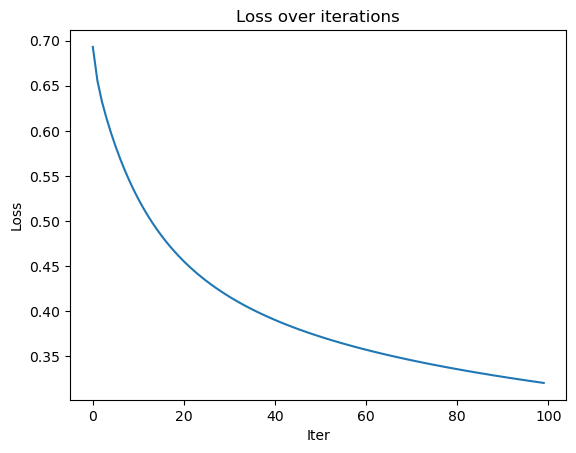

In [12]:
# X1 là bộ dữ liệu sử dụng thuộc tính Petal Lenght
X1 = iris['data'][:, 0:3]

y1 = (iris['target']  == 2).astype(np.int32)

# Sử dụng np.bincount() để đếm số lượng nhãn
count_labels_1 = np.bincount(y1)

print("Số lượng nhãn 0:", count_labels_1[0])
print("Số lượng nhãn 1:", count_labels_1[1])

X_new_1 = np.linspace(0, 2, 1000).reshape(-1, 1)
X_new_1 = np.concatenate((np.ones((X_new_1.shape[0], 1)), X_new_1, X_new_1**2, X_new_1**3), axis=1)

intercept1 = np.ones((X1.shape[0], 1))
X1 = np.concatenate((intercept1, X1), axis = 1)

w_best_1, loss_1 = fit(X1, y1, learning_rate=0.1, iter=100)
print("Trọng số tốt nhất: ",w_best_1)

from sklearn.metrics import accuracy_score
X_test_1 = X1[0:100]
y_test_1 = y1[0:100]
y_pred_1 = predict(w_best_1, X_test_1)

print("Accuracy_score: ", accuracy_score(y_test_1, y_pred_1))

import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=range(len(loss_1)), y=loss_1)
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()


In [15]:
y_pred_new_1 = predict(w_best_1, X_new_1)
print("Predict of X_new_1:\n", y_pred_new_1)

Predict of X_new_1:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X1, y1)
clf_y_pred_new_1 = clf.predict(X_new_1)
print("Predict of X_new_1:\n", clf_y_pred_new_1)
print("Accuracy_score between y_pred_new_1 và clf_y_pred_new_1: ", accuracy_score(y_pred_new_1, clf_y_pred_new_1))

Predict of X_new_1:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0